# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
##### Author: Chenyang Skylar Li

# Table of Contents
1. [Introduction](#introduction)
2. [Learning Algorithm](#learning-algorithm)
    - [Define a DBSCAN class](#define-a-dbscan-class)
    - [Showcase the above classifier in the moon dataset](#showcase-the-above-classifier-in-the-moon-dataset)
3. [Difference between K-means and DBSCAN](#difference-between-k-means-and-dbscan)
    - [Comparison of K-means and DBSCAN on the moon dataset](#comparison-of-k-means-and-dbscan-on-the-moon-dataset)
4. [Pros and Cons](#pros-and-cons)
5. [Suitable Tasks and Datasets](#suitable-tasks-and-datasets)
6. [References](#references)


## Introduction

DBSCAN, short for Density-Based Spatial Clustering of Applications with Noise, is a prominent clustering algorithm that was proposed by Martin Ester, Hans-Peter Kriegel, Jörg Sander, and Xiaowei Xu in 1996. Unlike partitioning clustering methods like k-means or hierarchical clustering, DBSCAN is an algorithm that falls under the category of density-based clustering.

In density-based clustering, clusters are defined as areas of higher density than the remainder of the dataset. DBSCAN, in particular, groups together points that are packed closely together, determined by a distance measure and a minimum number of points. It also marks as outliers the points that are in low-density regions.

The key advantage of DBSCAN is its capability of discovering clusters of arbitrary shapes. This is a significant improvement over methods like k-means, which assumes that clusters are convex and isotropic. DBSCAN can therefore handle complex spatial structures and spatial clusters of different densities. Moreover, it is robust to noise, effectively identifying outliers during the clustering process.

Over the years, DBSCAN has been applied in various fields, including computer vision, data analysis, and geospatial analytics, and remains a popular choice for clustering tasks owing to its versatility and simplicity.


## Learning Algorithm


The learning algorithm for DBSCAN consists of the following steps:

1. For each point $p$ in the dataset, determine the points within an $\epsilon$ radius. This can be represented as $N_\epsilon(p)$.
2. If a point $p$ has at least a minimum number of points (`minPts`) within its $\epsilon$ radius (i.e., $|N_\epsilon(p)| \geq \text{minPts}$), mark it as a **core point**. If it has less than `minPts` but is within the $\epsilon$ radius of another core point, mark it as a **border point**. Otherwise, mark it as **noise**.
3. Assign each point to a cluster by following the procedure:
   - If a point $p$ is a core point, create a new cluster and recursively add all directly reachable points within the $\epsilon$ radius to the cluster.
   - If a point $p$ is a border point, assign it to the cluster of the nearest core point.
   - If a point $p$ is noise, it will not be assigned to any cluster.

The $\epsilon$ radius and `minPts` are hyperparameters of the DBSCAN algorithm.


### Define a DBSCAN class



Fontconfig warning: ignoring UTF-8: not a valid region tag


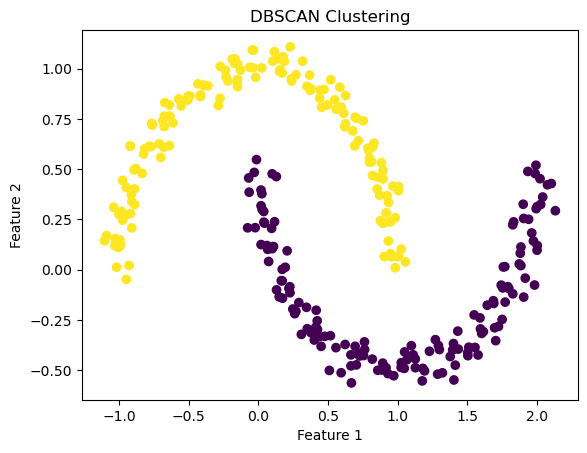

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from collections import deque

# Function to calculate Euclidean distance between two points
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# DBSCAN class
class DBSCAN:
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples

    def fit_predict(self, X):
        n_samples = X.shape[0]
        labels = np.full(n_samples, -1, dtype=int)  # -1 represents noise points
        cluster_id = 0

        for i in range(n_samples):
            if labels[i] != -1:  # Point already assigned to a cluster
                continue

            neighbors = self._find_neighbors(X, i)
            if len(neighbors) < self.min_samples:  # Noise point
                continue

            # Assign point and its neighbors to a new cluster
            self._expand_cluster(X, labels, i, neighbors, cluster_id)
            cluster_id += 1

        return labels

    def _find_neighbors(self, X, i):
        neighbors = []
        for j, x_j in enumerate(X):
            if euclidean_distance(X[i], x_j) <= self.eps:
                neighbors.append(j)
        return neighbors

    def _expand_cluster(self, X, labels, i, neighbors, cluster_id):
        labels[i] = cluster_id
        queue = deque(neighbors)

        while queue:
            j = queue.popleft()
            if labels[j] == -1:  # Noise point
                labels[j] = cluster_id
            elif labels[j] != -1:  # Point already assigned to a cluster
                continue

            new_neighbors = self._find_neighbors(X, j)
            if len(new_neighbors) >= self.min_samples:
                queue.extend(new_neighbors)

# Generate the "two moons" dataset
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# Apply the DBSCAN algorithm
dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(X)

# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()


### Showcase the above classifier in the moon dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Generate the "two moons" dataset
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# Apply the DBSCAN algorithm
dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(X)

# Evaluate the model using silhouette score
score = silhouette_score(X, clusters)
print(f"Silhouette Score: {score:.2f}")

# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()


## Difference between K-means and DBSCAN

The main differences between [k-means](./Kmeans.ipynb) and DBSCAN are:

- K-means requires the number of clusters as an input parameter, while DBSCAN does not.
- K-means is sensitive to the initial placement of centroids and may converge to local optima, while DBSCAN is more robust due to its density-based approach.
- K-means tends to work well with spherical clusters and may struggle with clusters of arbitrary shapes, while DBSCAN can find clusters of any shape.
- K-means is less robust to noise compared to DBSCAN, which can identify and separate noise points from clusters.
- DBSCAN can handle datasets with varying densities, while k-means assumes similar densities across clusters.

Here's a table to summarize the difference between DBSCAN and k-means clustering algorithms:

| Criterion            | DBSCAN                                          | k-means                                          |
|----------------------|-------------------------------------------------|--------------------------------------------------|
| Algorithm type       | Density-based clustering                        | Partition-based clustering                       |
| Cluster shapes       | Can handle clusters of arbitrary shapes         | Assumes spherical clusters                        |
| Number of clusters   | Automatically determined by the algorithm       | Must be specified in advance (hyperparameter)    |
| Noise handling       | Identifies and separates noise points           | No explicit noise handling; noise affects clusters|
| Cluster assignment   | Points can remain unassigned (noise)            | All points are assigned to a cluster             |
| Sensitivity to initialization | Not sensitive to initialization       | Sensitive to initial centroids selection         |
| Complexity           | $O(n \log n)$ with suitable index structure     | Typically $O(n \cdot k \cdot I \cdot t)$, where $n$: points, $k$: clusters, $I$: iterations, $t$: dimensions |
### Comparison of K-means and DBSCAN on the moon dataset




## Pros and Cons

**Pros:**
- Can find clusters of arbitrary shapes.
- Robust to noise.
- Does not require the number of clusters as an input parameter.
- Handles datasets with varying densities.
- Requires only two hyperparameters.

**Cons:**
- Not efficient with high-dimensional data.
- Sensitive to the choice of `eps` and `minPts` hyperparameters.
- Cannot handle clusters with different densities well.

## Suitable Tasks and Datasets

DBSCAN is a versatile clustering algorithm with a wide range of applications. It's particularly suitable for tasks and datasets with the following characteristics:

DBSCAN is a versatile clustering algorithm with a wide range of applications. It's particularly suitable for tasks and datasets with the following characteristics:

1. **Arbitrary Shaped Clusters**: Unlike K-means, DBSCAN can detect clusters of arbitrary shapes. This makes it suitable for tasks where the data points naturally form non-spherical clusters.
2. **Noise Handling**: DBSCAN is capable of detecting and marking noisy points that don’t belong to any cluster. This is particularly useful for tasks where the data contains outliers or irrelevant points.
3. **Density-Based Clusters**: DBSCAN is ideal for tasks where the clusters are defined based on the density of the data points, i.e., regions of the data space where there are high densities of data points separated by regions with low densities of data points.
4. **Unknown Number of Clusters**: Unlike K-means, with DBSCAN, you don't need to specify the number of clusters a priori. This makes DBSCAN suitable for datasets where the number of clusters is unknown.

DBSCAN has been effectively used in various applications including:

- **Anomaly Detection**: DBSCAN's ability to identify noise or outliers makes it an excellent choice for anomaly detection tasks.
- **Image Segmentation**: DBSCAN can segment different parts of an image based on the density of the pixels.
- **Spatial Data Analysis**: In spatial or geographical data, DBSCAN can identify areas of high density, like urban areas or areas of forest.
- **Pattern Recognition**: DBSCAN can identify and group similar patterns in a dataset, making it useful for tasks like handwriting recognition or gene sequence analysis.

Please note that DBSCAN might not perform well with high-dimensional data, as the concept of "density" becomes less meaningful in high-dimensional spaces (a phenomenon sometimes referred to as the "curse of dimensionality").

## References

1. Ester, M., Kriegel, H. P., Sander, J., & Xu, X. (1996, August). A density-based algorithm for discovering clusters in large spatial databases with noise. In kdd (Vol. 96, No. 34, pp. 226-231).
2. Scikit-Learn: Density-Based Spatial Clustering of Applications with Noise (DBSCAN) - https://scikit-learn.org/stable/modules/clustering.html#dbscan
3. Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".